In [1]:
from darts import TimeSeries
import pandas as pd
from darts.models import ExponentialSmoothing
import matplotlib.pyplot as plt

In [2]:
# Read a pandas DataFrame
df = pd.read_csv('../../../data/prepared/df_energy_climate_2020.csv')

## Exponential smoothing

In [3]:

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "datetime", "energy_price")

# Set aside the 20 percent as a validation series
train, val = series[:-1752], series[-1752:]

In [4]:

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

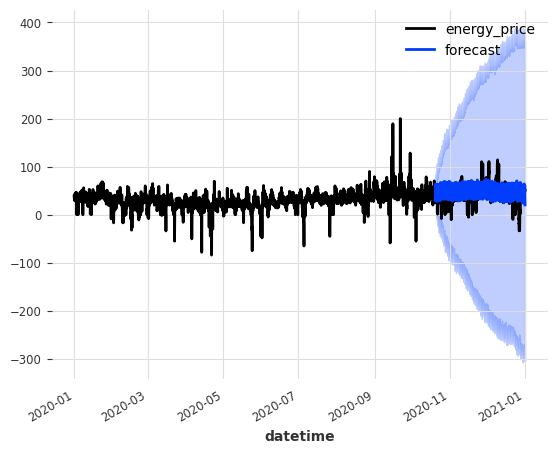

In [5]:

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()